In [ ]:
import pandas as pd

In [ ]:
import numpy as np


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files

In [ ]:
upd = files.upload()

Saving German Foreign expenses.xlsx to German Foreign expenses.xlsx


In [ ]:
import io
dt = io.BytesIO(upd['German Foreign expenses.xlsx'])
df = pd.read_excel(dt,sheet_name='Sheet1')

In [ ]:
df.head()

Hostel(0 or 1)  Room(0 or 1)  ...  Entertainment Expense  HealthCare Expense
0               0             1  ...                  48.57              100.69
1               0             1  ...                  49.25               98.32
2               1             0  ...                  47.52               99.65
3               1             0  ...                  46.32               96.23
4               0             1  ...                  28.44              109.36

[5 rows x 10 columns]

In [ ]:
df.isnull().sum()

Hostel(0 or 1)           0
Room(0 or 1)             0
Living Expense           0
Veg (0 or 1)             0
Non Veg(0 or 1)          0
Food Expense             0
Transport Expense        0
Personal Expense         0
Entertainment Expense    0
HealthCare Expense       0
dtype: int64

In [ ]:
df.describe().transpose()

count       mean        std  ...      50%       75%     max
Hostel(0 or 1)           8.0    0.50000   0.534522  ...    0.500    1.0000    1.00
Room(0 or 1)             8.0    0.50000   0.534522  ...    0.500    1.0000    1.00
Living Expense           8.0  372.55500  28.877703  ...  380.605  386.2125  402.91
Veg (0 or 1)             8.0    0.50000   0.534522  ...    0.500    1.0000    1.00
Non Veg(0 or 1)          8.0    0.50000   0.534522  ...    0.500    1.0000    1.00
Food Expense             8.0   80.99125  31.231321  ...   83.325  109.7325  112.97
Transport Expense        8.0   66.39375  29.884079  ...   71.525   91.7925   97.13
Personal Expense         8.0   24.15875   2.469762  ...   24.170   26.0650   27.56
Entertainment Expense    8.0   38.90000   9.703767  ...   38.770   47.7825   49.25
HealthCare Expense       8.0  103.73750   5.586529  ...  103.830  108.6100  110.32

[10 rows x 8 columns]

In [ ]:
df['TE'] = df['Entertainment Expense'] + df['Food Expense'] + df['HealthCare Expense'] + df['Living Expense'] + df['Transport Expense'] + df['Personal Expense']

In [ ]:
sns.distplot(df['TE'],bins=20)

In [ ]:
df.corr()['TE']

Hostel(0 or 1)           0.428822
Room(0 or 1)            -0.428822
Living Expense           0.824718
Veg (0 or 1)             0.020252
Non Veg(0 or 1)         -0.020252
Food Expense             0.424776
Transport Expense       -0.288860
Personal Expense         0.019053
Entertainment Expense   -0.244063
HealthCare Expense       0.059280
TE                       1.000000
Name: TE, dtype: float64

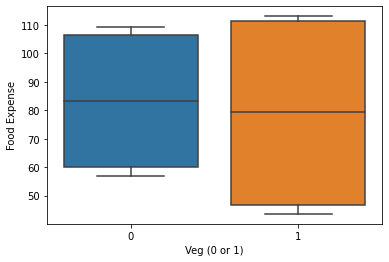

In [ ]:
sns.boxplot(x='Veg (0 or 1)',y='Food Expense',data=df)

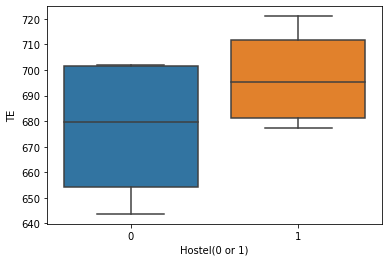

In [ ]:
sns.boxplot(x='Hostel(0 or 1)',y='TE',data=df)

In [ ]:
df.sort_values('TE',ascending=False)

Hostel(0 or 1)  Room(0 or 1)  ...  HealthCare Expense      TE
2               1             0  ...               99.65  721.02
3               1             0  ...               96.23  708.61
4               0             1  ...              109.36  701.84
5               0             1  ...              108.36  701.33
6               1             0  ...              106.97  682.38
7               1             0  ...              110.32  677.39
1               0             1  ...               98.32  657.61
0               0             1  ...              100.69  643.71

[8 rows x 11 columns]

In [ ]:
df.groupby('Hostel(0 or 1)').mean()['TE']

Hostel(0 or 1)
0    676.1225
1    697.3500
Name: TE, dtype: float64

In [ ]:
df.columns

Index(['Hostel(0 or 1)', 'Room(0 or 1)', 'Living Expense', 'Veg (0 or 1)',
       'Non Veg(0 or 1)', 'Food Expense', 'Transport Expense',
       'Personal Expense', 'Entertainment Expense', 'HealthCare Expense',
       'TE'],
      dtype='object')

In [ ]:
x = df.drop('TE',axis=1).values
y = df['TE'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=20)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scl = MinMaxScaler()

In [ ]:
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

In [ ]:
X_train

array([[0.        , 1.        , 0.        , 0.        , 1.        ,
        0.25122514, 1.        , 0.44465649, 1.        , 0.15917746],
       [1.        , 0.        , 0.67993412, 1.        , 0.        ,
        0.97117325, 0.        , 1.        , 0.13358962, 0.81797411],
       [0.        , 1.        , 1.        , 1.        , 0.        ,
        0.        , 0.95062271, 0.8148855 , 0.        , 1.        ],
       [1.        , 0.        , 0.67993412, 1.        , 0.        ,
        1.        , 0.42974359, 0.68129771, 0.91686689, 0.2604722 ],
       [1.        , 0.        , 0.714521  , 0.        , 1.        ,
        0.94739118, 0.38446886, 0.        , 0.85920231, 0.        ]])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
mdl = Sequential()

In [ ]:
X_train.shape

(5, 10)

In [ ]:
mdl.add(Dense(10,activation='relu'))
mdl.add(Dense(5,activation='relu'))
mdl.add(Dense(1))
mdl.compile(optimizer='adam',loss='mse')

In [ ]:
mdl.fit(x=X_train,y=Y_train,validation_data=(X_test,Y_test),epochs=7)

Epoch 1/7
1/1 [==============================] - 0s 132ms/step - loss: 482536.8438 - val_loss: 455018.5938
Epoch 2/7
1/1 [==============================] - 0s 21ms/step - loss: 482525.0000 - val_loss: 455006.5312
Epoch 3/7
1/1 [==============================] - 0s 20ms/step - loss: 482513.1562 - val_loss: 454994.3438
Epoch 4/7
1/1 [==============================] - 0s 18ms/step - loss: 482501.0938 - val_loss: 454981.9062
Epoch 5/7
1/1 [==============================] - 0s 18ms/step - loss: 482488.9062 - val_loss: 454969.4062
Epoch 6/7
1/1 [==============================] - 0s 20ms/step - loss: 482476.5625 - val_loss: 454956.7188
Epoch 7/7
1/1 [==============================] - 0s 20ms/step - loss: 482463.9062 - val_loss: 454943.7812


In [ ]:
losses = pd.DataFrame(mdl.history.history)

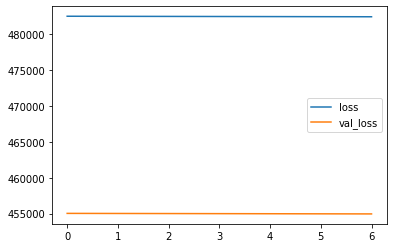

In [ ]:
losses.plot()

In [ ]:
pd.DataFrame(mdl.history.history)

loss      val_loss
0  482536.84375  455018.59375
1  482525.00000  455006.53125
2  482513.15625  454994.34375
3  482501.09375  454981.90625
4  482488.90625  454969.40625
5  482476.56250  454956.71875
6  482463.90625  454943.78125

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [ ]:
prdct = mdl.predict(X_test)

In [ ]:
prdct

array([[0.06109975],
       [0.06503353],
       [0.06088319]], dtype=float32)

In [ ]:
np.sqrt(mean_squared_error(Y_test,prdct))

674.4952103211353

In [ ]:
mean_absolute_error(Y_test,prdct)

674.0809945117434

In [ ]:
df['TE'].describe()

count      8.000000
mean     686.736250
std       26.459843
min      643.710000
25%      672.445000
50%      691.855000
75%      703.532500
max      721.020000
Name: TE, dtype: float64

In [ ]:
explained_variance_score(Y_test,prdct)

2.3101222189181314e-05

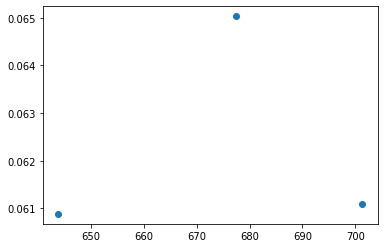

In [ ]:
plt.scatter(Y_test,prdct)

In [ ]:
sm = df.drop('TE',axis=1).iloc[0]

In [ ]:
sm

Hostel(0 or 1)             0.00
Room(0 or 1)               1.00
Living Expense           326.05
Veg (0 or 1)               1.00
Non Veg(0 or 1)            0.00
Food Expense              47.58
Transport Expense         97.13
Personal Expense          23.69
Entertainment Expense     48.57
HealthCare Expense       100.69
Name: 0, dtype: float64

In [ ]:
sm_upd = scl.transform(sm.values.reshape(-1,10))

In [ ]:
rst = mdl.predict(sm_upd)*(10545.905)

In [ ]:
rst


array([[642.0681]], dtype=float32)

In [ ]:
import json
f_nl = {"Estimation" : str(rst) }
f_nl = str(f_nl)
rst = json.dumps(f_nl)

In [ ]:
rst

'"{\'Estimation\': \'[[642.0681]]\'}"'